:Kishan Rajoria

# Multiple Linear Regression

# HVAC SYSTEM

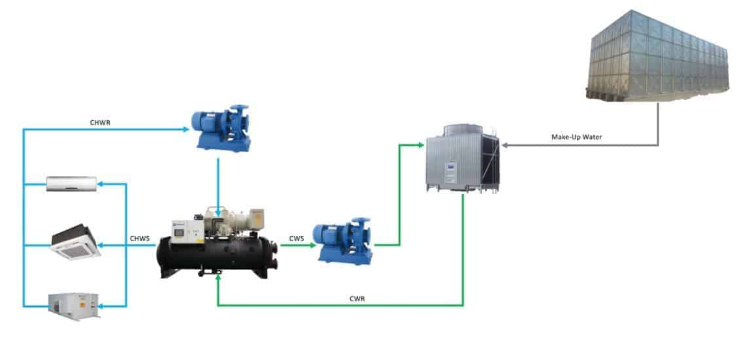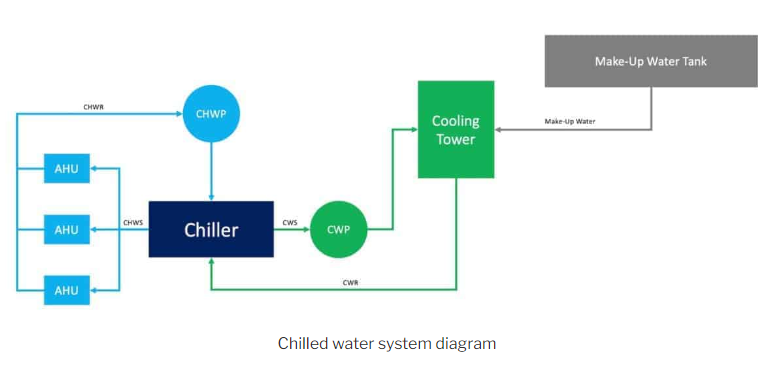
Image_Source:https://aircondlounge.com/chilled-water-system/

Data Understanding

1) 'Chilled Water Rate (L/sec)':Chiller design flow rate is 1.5 gpm per ton [0.027 L/s per kWr] and the minimum is 1.2 gpm per ton [0.022 L/s per kWr].

2) 'Cooling Water Temperature (C)':For cooling water (16°C to 30°C), cooling towers are widely used and offer good opportunities for energy saving through low-cost actions such as VSDs for fan control.

3) 'Building Load (RT)': As Refrigeration Ton (RT) is the widely adopted unit of cooling load in air-conditioning industry, both units W/m² and m²/RT are used to represent the cooling load usage in this article.

4) 'Dew Point (F)':To calculate the dew point: Measure the temperature and relative humidity of the air. Multiply 17.625 by the temperature and divide the result by the temperature plus 243.0

5) 'Humidity (%)': Relative humidity (RH) (expressed as a percent) also measures water vapor, but RELATIVE to the temperature of the air. In other words, it is a measure of the actual amount of water vapor in the air compared to the total amount of vapor that can exist in the air at its current temperature.

6) 'Wind Speed (mph)': The below are the insights,
0 --- Calm	less than 1 mph (0 m/s)
2 --- Light breeze	4 - 7 mph 2-3 m/s
3 --- Gentle breeze	8 - 12 mph 3.5-5 m/s
4 --- Moderate breeze	13 - 18 mph 5.5-8 m/s
5 --- Fresh breeze	19 - 24 mph 8.5-10.5 m/s

7) 'Pressure (in)':The refrigerant is sucked into the compressor from the evaporator as a cold, low pressure gas at 1.91 barg.

8) 'Chiller Energy Consumption (kWh)': This means that for every 1kW of electricity you put into the machine, you will produce 5.4kW of cooling. 2,500kW / 460kW = 5.4 so the COP is 5.4. This means that for every 1kW of electricity you put into the machine, you will produce 5.4kW of cooling

Target: To Predict consumption fo Chiller Power

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [2]:
dataset = pd.read_csv('HVAC_Energy_Data.csv')

In [3]:
dataset.columns

Index(['DateTime', 'Chilled Water Rate (L/sec)',
       'Cooling Water Temperature (C)', 'Building Load (RT)',
       'Outside Temperature (F)', 'Dew Point (F)', 'Humidity (%)',
       'Wind Speed (mph)', 'Pressure (in)', 'Chiller Energy Consumption (kWh)',
       'Perfomance'],
      dtype='object')

In [4]:
dataset.set_index(['DateTime'], inplace=True)

In [5]:
dataset.head()

,Chilled Water Rate (L/sec),Cooling Water Temperature (C),Building Load (RT),Outside Temperature (F),Dew Point (F),Humidity (%),Wind Speed (mph),Pressure (in),Chiller Energy Consumption (kWh),Perfomance
DateTime,,,,,,,,,,
8/18/2019 0:00,85.6,31.4,479.6,82,75,79,13,29.83,116.2,Bad performance
8/18/2019 0:30,84.3,31.1,460.3,82,75,79,12,29.83,114.5,Bad performance
8/18/2019 1:00,84.6,31.3,462.4,82,75,79,12,29.83,116.8,Bad performance
8/18/2019 1:30,84.8,31.4,458.5,82,75,79,12,29.83,117.0,Bad performance
8/18/2019 2:00,84.7,31.4,455.4,82,75,79,12,29.83,117.0,Bad performance


array([<AxesSubplot:xlabel='DateTime'>, <AxesSubplot:xlabel='DateTime'>,
       <AxesSubplot:xlabel='DateTime'>, <AxesSubplot:xlabel='DateTime'>,
       <AxesSubplot:xlabel='DateTime'>, <AxesSubplot:xlabel='DateTime'>,
       <AxesSubplot:xlabel='DateTime'>, <AxesSubplot:xlabel='DateTime'>,
       <AxesSubplot:xlabel='DateTime'>], dtype=object)

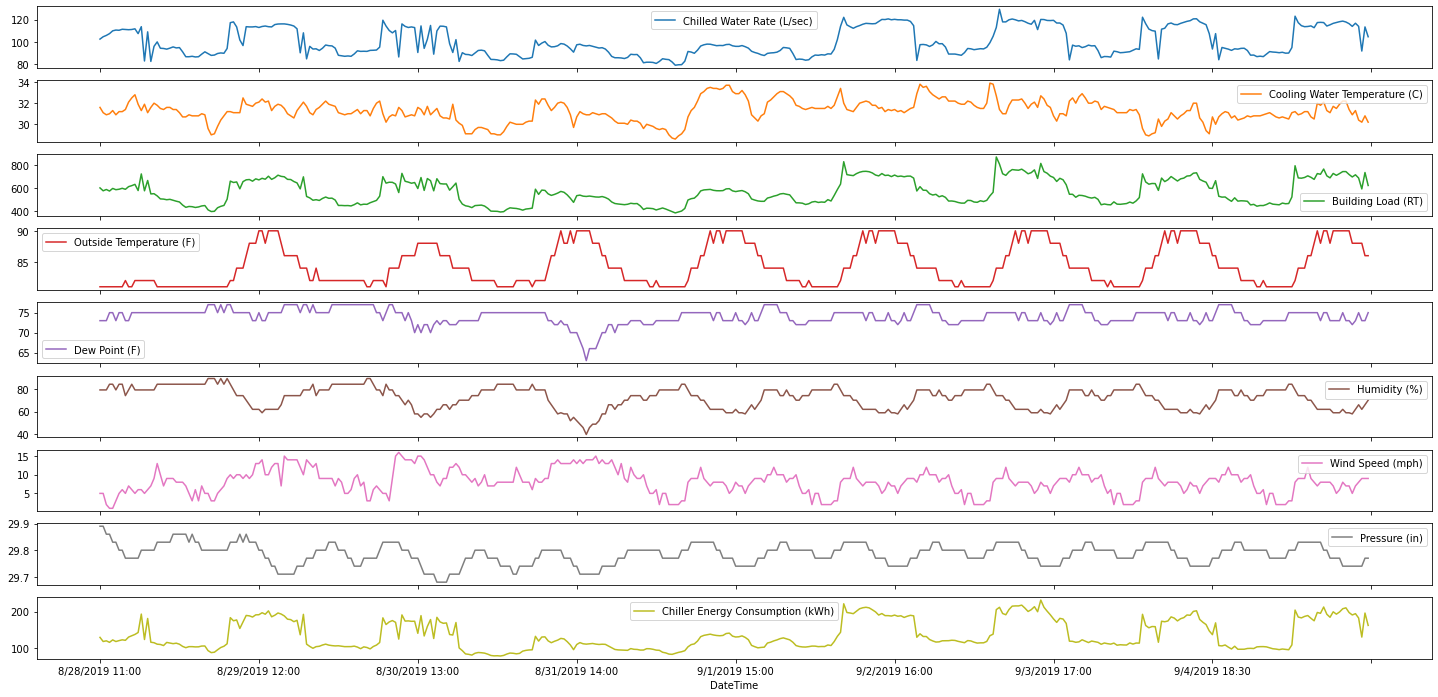

In [6]:
dataset[500:900].plot(subplots=True, figsize=(25,12)) #view Data set

In [7]:
dataset.describe() #check Std, min and max values of the features

,Chilled Water Rate (L/sec),Cooling Water Temperature (C),Building Load (RT),Outside Temperature (F),Dew Point (F),Humidity (%),Wind Speed (mph),Pressure (in),Chiller Energy Consumption (kWh)
count,13615.000000,13615.000000,13615.000000,13615.000000,13615.000000,13615.000000,13615.000000,13615.000000,13615.000000
mean,96.740720,31.622277,520.940419,83.104003,74.990892,77.846272,6.306794,29.808199,126.811605
std,12.558907,1.253298,96.336004,3.841550,1.889539,11.050784,3.742418,0.051419,30.160350
min,72.400000,25.800000,55.100000,73.000000,59.000000,34.000000,0.000000,29.620000,18.000000
25%,86.900000,30.800000,443.500000,81.000000,73.000000,70.000000,3.000000,29.770000,105.600000
50%,94.200000,31.500000,495.600000,82.000000,75.000000,79.000000,6.000000,29.800000,118.100000
75%,106.100000,32.500000,595.000000,86.000000,77.000000,84.000000,9.000000,29.830000,138.300000
max,141.500000,36.200000,1088.400000,93.000000,81.000000,100.000000,21.000000,29.950000,281.200000


Refrigation load is max 1088 and min 55. Due to weekend variation. Standard Deviation in Building load is 96.

# Checking the correlation between each features

<AxesSubplot:>

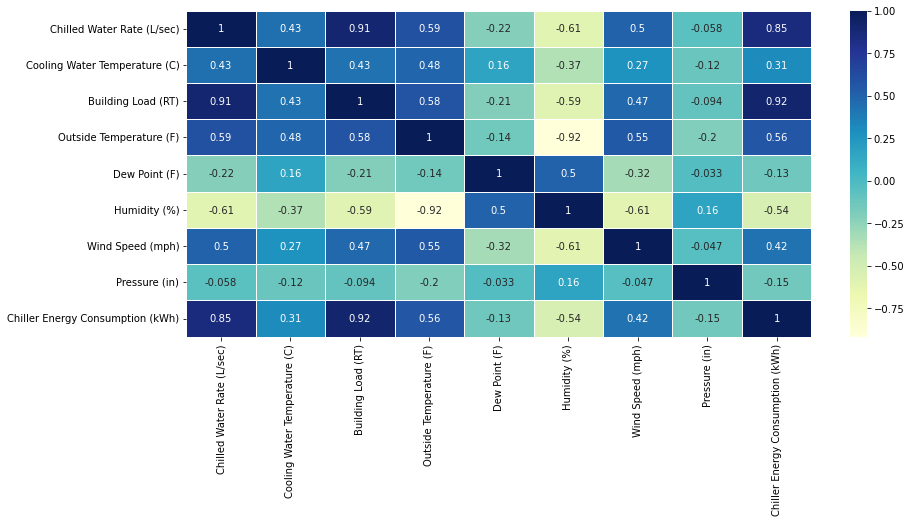

In [8]:
plt.figure(figsize=(14,6))

sns.heatmap(dataset.corr(), linewidth = 0.6, cmap="YlGnBu", annot=True)

Building load is Highly correlated with chilled water rate and the power consumption of chiller.

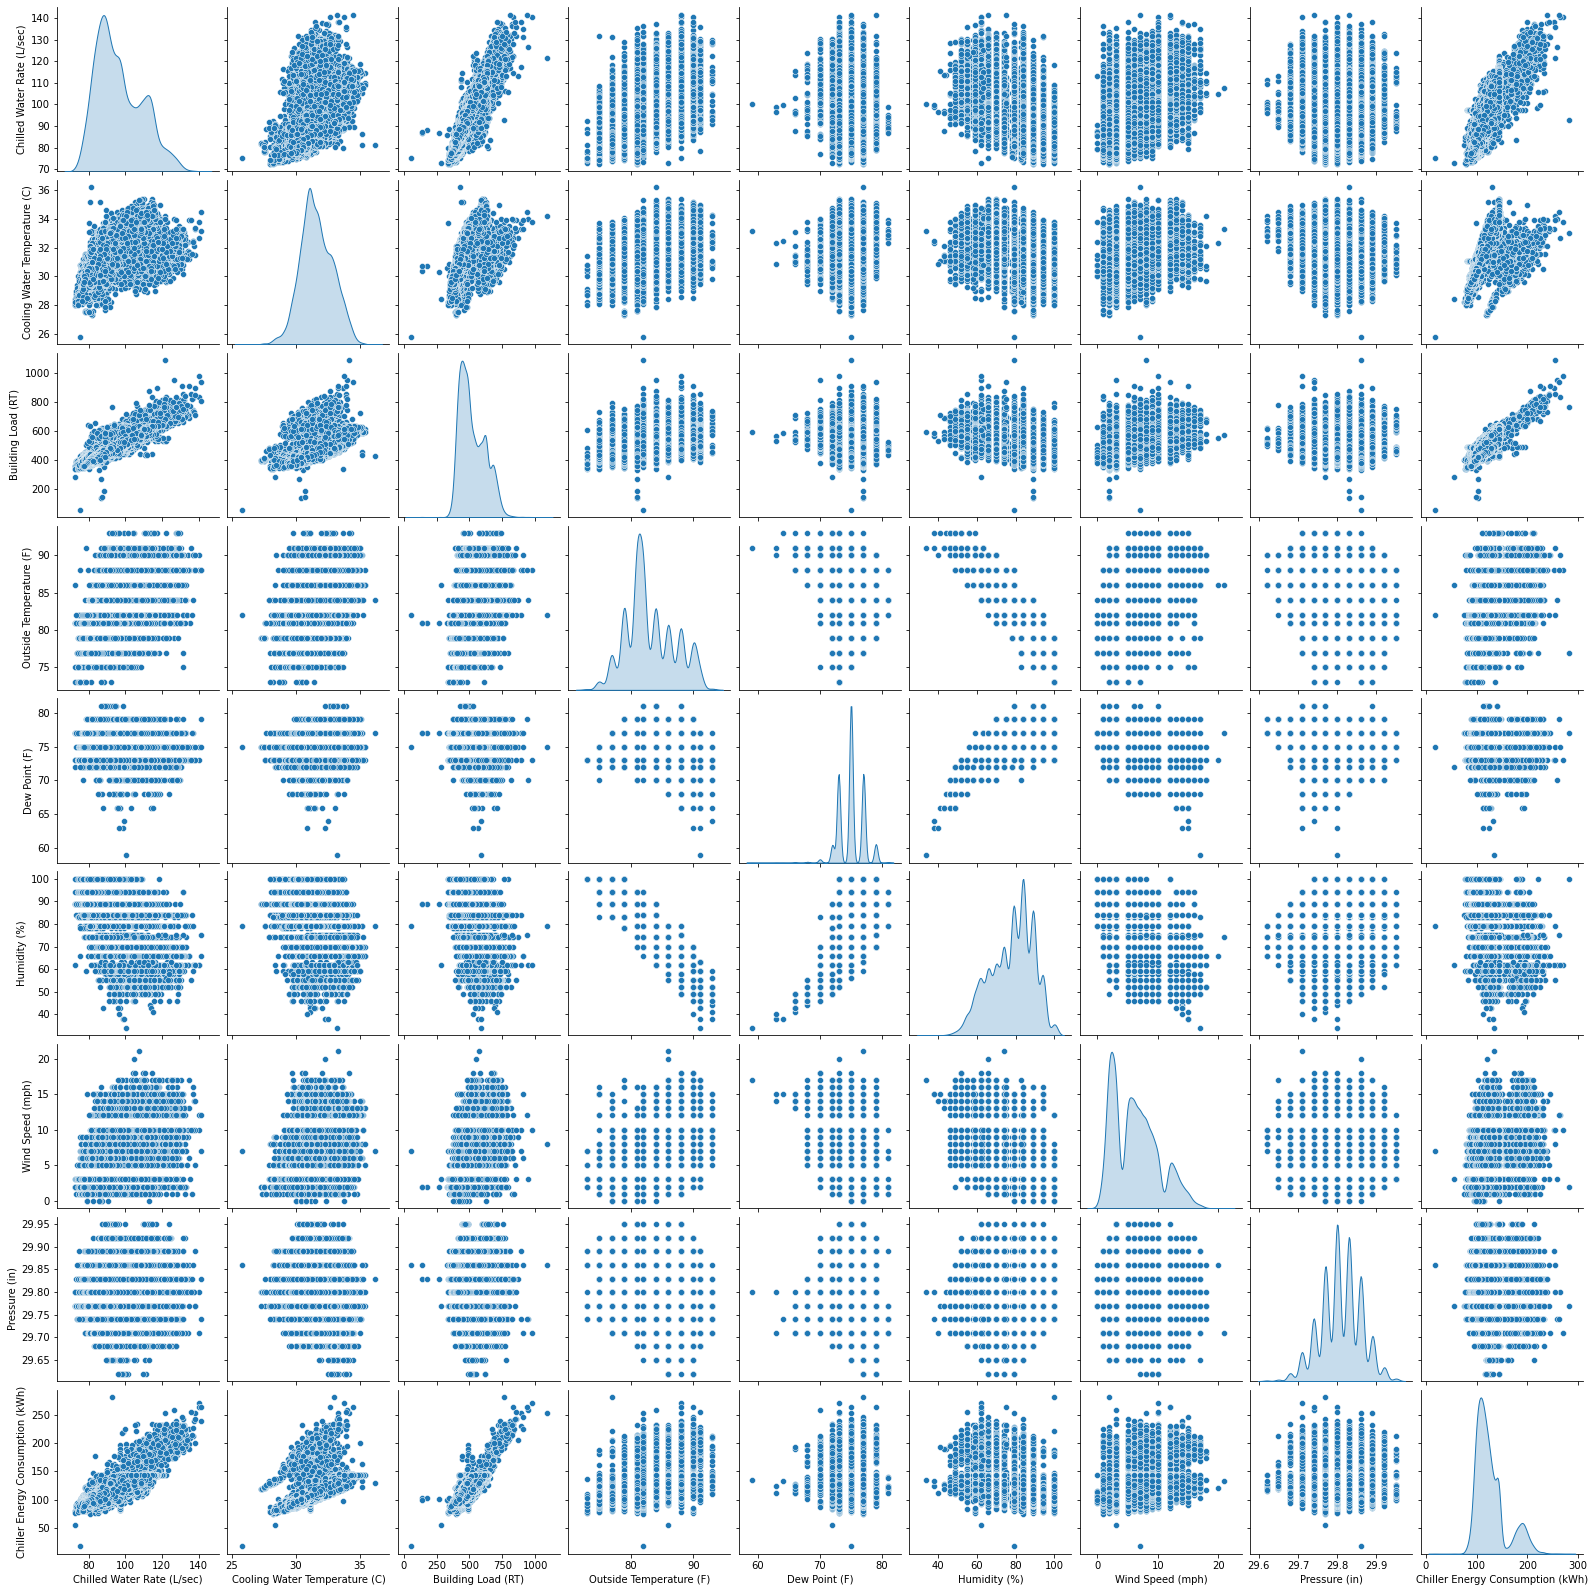

In [9]:
sns.pairplot(dataset, diag_kind='kde')

# Checking the Distribution of the Data

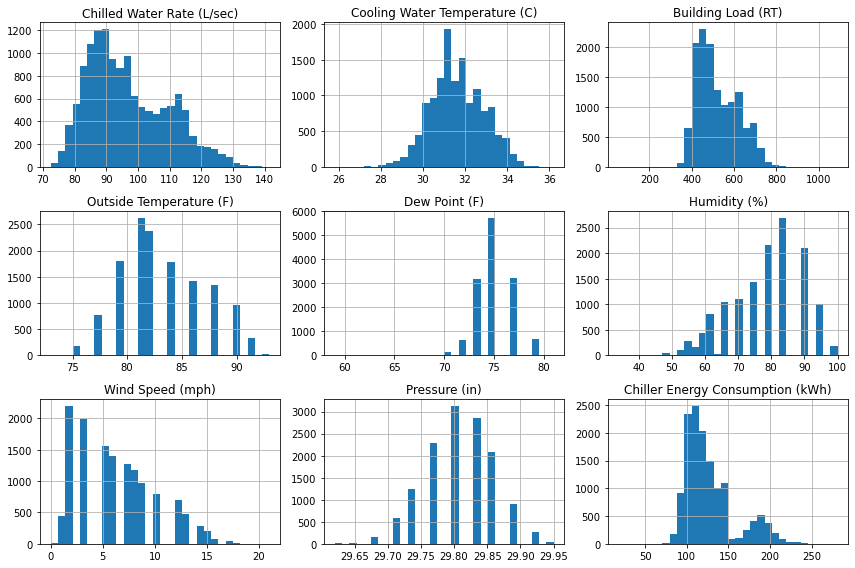

In [10]:
dataset.hist(figsize=(12,8),bins=30)
plt.tight_layout()

# Checking the outliers of Target variable and other features

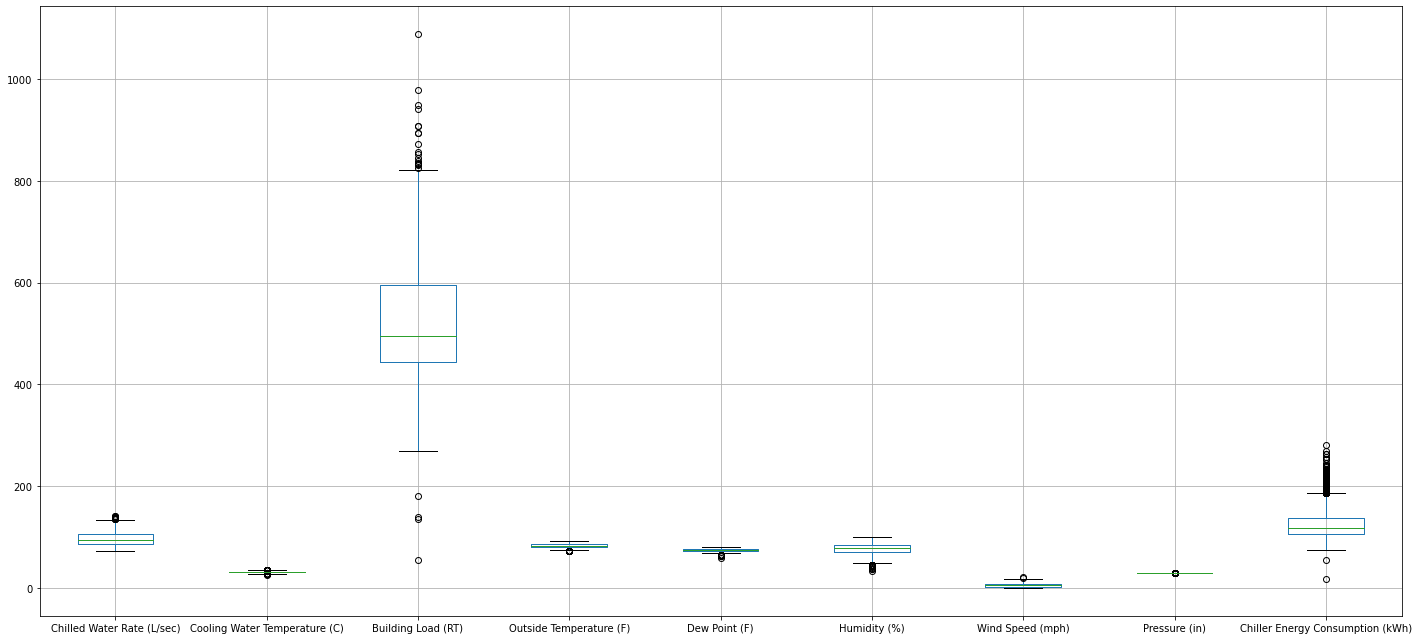

In [11]:
dataset.boxplot(figsize=(20,9))
plt.tight_layout()
plt.show()

# Spliting the Dataset

In [12]:
X = dataset.iloc[:, :-2].values
y = dataset.iloc[:, -2].values

In [13]:
X

array([[ 85.6 ,  31.4 , 479.6 , ...,  79.  ,  13.  ,  29.83],
       [ 84.3 ,  31.1 , 460.3 , ...,  79.  ,  12.  ,  29.83],
       [ 84.6 ,  31.3 , 462.4 , ...,  79.  ,  12.  ,  29.83],
       ...,
       [108.7 ,  33.  , 561.7 , ...,  79.  ,   6.  ,  29.89],
       [108.8 ,  33.2 , 566.  , ...,  84.  ,   3.  ,  29.86],
       [108.7 ,  33.3 , 569.7 , ...,  79.  ,   5.  ,  29.86]])

In [14]:
y

array([116.2, 114.5, 116.8, ..., 125.7, 127.3, 129. ])

## Encoding categorical data

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [16]:
print(X)

[[ 0.    0.    0.   ... 79.   13.   29.83]
 [ 0.    0.    0.   ... 79.   12.   29.83]
 [ 0.    0.    0.   ... 79.   12.   29.83]
 ...
 [ 0.    0.    0.   ... 79.    6.   29.89]
 [ 0.    0.    0.   ... 84.    3.   29.86]
 [ 0.    0.    0.   ... 79.    5.   29.86]]


## Splitting the dataset into the Training set and Test set

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Multiple Linear Regression model on the Training set

In [18]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Predicting the Test set results

In [19]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 98.82  95.6 ]
 [106.34 114.  ]
 [128.09 115.5 ]
 ...
 [107.85 118.  ]
 [110.34 120.  ]
 [116.17 119.2 ]]


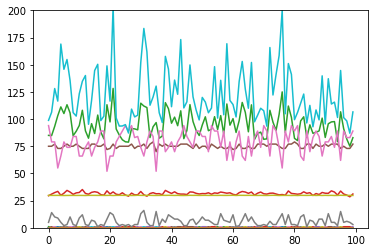

In [20]:
plt.plot(X_test[0:100],label='actual')
plt.plot(y_pred[0:100],label='Prediction')
plt.ylim(0,200)
plt.show()